# Advanced Fraud Modeling in R

This notebook covers the material in the AI+ Training course on advanced fraud modeling. It goes through three main modules as follows:

1. Data Preparation
2. Supervised Modeling
3. Implementation Deployment

The following code loads all the necessary packages and libraries for the analysis.

In [1]:
# Needed Packages for Analysis #
install.packages("robustbase")
install.packages("car")
install.packages("stats")
install.packages("randomForest")
install.packages("lubridate")
install.packages("dplyr")
install.packages("MASS")
install.packages("ggplot2")
install.packages("e1071")
install.packages("smotefamily")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("xgboost")
install.packages("Matrix")
install.packages("ROCR")
install.packages("InformationValue")
install.packages("lime")
install.packages("caret")


  There is a binary version available but the source version is later:
           binary source needs_compilation
robustbase 0.93-6 0.93-7              TRUE

  Binaries will be installed
package 'robustbase' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Aric\AppData\Local\Temp\Rtmpa6xWjP\downloaded_packages
package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Aric\AppData\Local\Temp\Rtmpa6xWjP\downloaded_packages


Warning message:
"package 'stats' is not available (for R version 3.6.1)"Warning message:
"package 'stats' is a base package, and should not be updated"

package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Aric\AppData\Local\Temp\Rtmpa6xWjP\downloaded_packages
package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Aric\AppData\Local\Temp\Rtmpa6xWjP\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Aric\AppData\Local\Temp\Rtmpa6xWjP\downloaded_packages
package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Aric\AppData\Local\Temp\Rtmpa6xWjP\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Aric\AppData\Local\Temp\Rtmpa6xWjP\downloaded_packages
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Aric\AppData\Local\Temp\Rtmpa6xWjP\downloaded_packages
package 's

In [2]:
# Needed Libraries for Analysis #
library(MASS)
library(robustbase)
library(car)
library(stats)
library(randomForest)
library(lubridate)
library(e1071)
library(ggplot2)
library(dplyr)
library(smotefamily)
library(rpart)
library(rpart.plot)
library(xgboost)
library(Matrix)
library(caret)
library(ROCR)
library(InformationValue)
library(lime)


Warning message:
"package 'MASS' was built under R version 3.6.3"Warning message:
"package 'robustbase' was built under R version 3.6.3"Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

Warning message:
"package 'e1071' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is 

## Data Preparation

This module details the area of data preparation for good Fraud detection. Fraud detection is only as good as the data and the features that you have to detect anomalies and possible fraud in your data. This module covers four main concepts in data preparation:

1. Feature Engineering
2. Fraud Data
3. Sampling Concerns

Let's load the dataset we will be working with.

In [3]:
ins <- read.csv("transactions_ins.csv")

head(ins)

Date       Cust_ID      Transaction Type Reward_R Reward_A Cov_Limit Income
1 9/10/1977  PSX000100006 IN          T     NA         NA     50000    61000 
2 12/31/2005 PSX000100006 CL          T     NA         NA     50000    61000 
3 1/17/2006  PSX000100006 RE          T    265      50000        NA       NA 
4 12/15/1998 PSX000100010 IN          T     NA         NA    100000    29000 
5 6/7/1961   PSX000100013 IN          V     NA         NA    100000    48000 
6 6/12/2001  PSX000100013 CL          V     NA         NA    100000    48000

In [4]:
summary(ins)

        Date                Cust_ID       Transaction Type      
 9/15/2010:    44   PSX000704539:    21   CH: 68539   T:139958  
 8/15/2012:    43   PSX000602071:    19   CL: 44659   V: 82647  
 4/1/2010 :    42   PSX00096928 :    19   IN:121191   W: 56272  
 4/16/2008:    42   PSX000842653:    18   RE: 44488             
 6/28/2013:    41   PSX000112259:    17                         
 7/14/2011:    41   PSX00025304 :    17                         
 (Other)  :278624   (Other)     :278766                         
    Reward_R         Reward_A         Cov_Limit           Income      
 Min.   :100.0    Min.   :      0   Min.   :  50000   Min.   : 15000  
 1st Qu.:207.0    1st Qu.: 100000   1st Qu.: 100000   1st Qu.: 34422  
 Median :314.0    Median : 150000   Median : 150000   Median : 50000  
 Mean   :315.7    Mean   : 224725   Mean   : 205779   Mean   : 53364  
 3rd Qu.:421.0    3rd Qu.: 300000   3rd Qu.: 250000   3rd Qu.: 68026  
 Max.   :579.0    Max.   :2700000   Max.   :2700000   

In [5]:
ins$Date <- as.Date(ins$Date, "%m/%d/%Y")

### Feature Engineering

The concept of feature engineering is vitally important to fraud detection. In my personal experience, the best features aren't just automatically generated by a computer, but thought up by a knowledgable individual working on the problem. 

We are going to role up the transactions to be one per individual. Here are some basic features when rolling up our transactions that might be important when discovering fraud:
- Final income
- Time between claim and reward
- Coverage limit to income ratio at claim

Think of some more of your own!

Let's create final income.

In [6]:
ins_income <- ins %>% filter(Transaction == 'CL') %>% select(Cust_ID, Cov_Limit, Income)

head(ins_income, n = 10)

Cust_ID      Cov_Limit Income
1  PSX000100006  50000     61000
2  PSX000100013 100000     48000
3  PSX000100073 100000     35000
4  PSX000100081  50000     69000
5  PSX000100122 150000    105000
6  PSX000100146 100000     38000
7  PSX000100231 400000     79155
8  PSX000100236 250000     54738
9  PSX000100286 150000     95973
10 PSX00010030  350000     37725

Now, let's create time in between claim and reward.

In [7]:
ins_time <- ins %>% filter(Transaction == 'CL' | Transaction == 'RE') 

head(ins_time, n = 10)

Date       Cust_ID      Transaction Type Reward_R Reward_A Cov_Limit Income
1  2005-12-31 PSX000100006 CL          T     NA          NA    50000     61000
2  2006-01-17 PSX000100006 RE          T    265       50000       NA        NA
3  2001-06-12 PSX000100013 CL          V     NA          NA   100000     48000
4  2001-07-11 PSX000100013 RE          V    265      100000       NA        NA
5  2004-01-21 PSX000100073 CL          V     NA          NA   100000     35000
6  2004-02-14 PSX000100073 RE          V    450      100000       NA        NA
7  2009-06-28 PSX000100081 CL          T     NA          NA    50000     69000
8  2009-07-26 PSX000100081 RE          T    543           0       NA        NA
9  1991-08-23 PSX000100122 CL          T     NA          NA   150000    105000
10 1991-09-08 PSX000100122 RE          T    200      150000       NA        NA

In [8]:
ins_time$diff <- ins_time$Date - lag(ins_time$Date)

head(ins_time, n = 10)

Date       Cust_ID      Transaction Type Reward_R Reward_A Cov_Limit Income
1  2005-12-31 PSX000100006 CL          T     NA          NA    50000     61000
2  2006-01-17 PSX000100006 RE          T    265       50000       NA        NA
3  2001-06-12 PSX000100013 CL          V     NA          NA   100000     48000
4  2001-07-11 PSX000100013 RE          V    265      100000       NA        NA
5  2004-01-21 PSX000100073 CL          V     NA          NA   100000     35000
6  2004-02-14 PSX000100073 RE          V    450      100000       NA        NA
7  2009-06-28 PSX000100081 CL          T     NA          NA    50000     69000
8  2009-07-26 PSX000100081 RE          T    543           0       NA        NA
9  1991-08-23 PSX000100122 CL          T     NA          NA   150000    105000
10 1991-09-08 PSX000100122 RE          T    200      150000       NA        NA
   diff      
1     NA days
2     17 days
3  -1680 days
4     29 days
5    924 days
6     24 days
7   1961 days
8     28 days
9  -6547 days
10    16 days

In [9]:
ins_time <- ins_time %>% filter(Transaction == 'RE') %>% select(-Cov_Limit, -Income, -Transaction)

head(ins_time, n = 10)

Date       Cust_ID      Type Reward_R Reward_A diff   
1  2006-01-17 PSX000100006 T    265       50000   17 days
2  2001-07-11 PSX000100013 V    265      100000   29 days
3  2004-02-14 PSX000100073 V    450      100000   24 days
4  2009-07-26 PSX000100081 T    543           0   28 days
5  1991-09-08 PSX000100122 T    200      150000   16 days
6  2009-04-21 PSX000100146 T    275      100000   20 days
7  2008-05-05 PSX000100231 V    405      400000   25 days
8  1970-10-06 PSX000100236 T    469      250000   24 days
9  2003-03-20 PSX000100286 V    337      150000   22 days
10 1980-01-09 PSX00010030  T    377      350000   23 days

Lastly, let's combine our datasets from above and create coverage limit to income ratio.

In [10]:
ins_feat <- merge(ins_time, ins_income)

head(ins_feat, n = 10)

Cust_ID      Date       Type Reward_R Reward_A diff    Cov_Limit Income
1  PSX000100006 2006-01-17 T    265       50000   17 days  50000     61000
2  PSX000100013 2001-07-11 V    265      100000   29 days 100000     48000
3  PSX000100073 2004-02-14 V    450      100000   24 days 100000     35000
4  PSX000100081 2009-07-26 T    543           0   28 days  50000     69000
5  PSX000100122 1991-09-08 T    200      150000   16 days 150000    105000
6  PSX000100146 2009-04-21 T    275      100000   20 days 100000     38000
7  PSX000100231 2008-05-05 V    405      400000   25 days 400000     79155
8  PSX000100236 1970-10-06 T    469      250000   24 days 250000     54738
9  PSX000100286 2003-03-20 V    337      150000   22 days 150000     95973
10 PSX00010030  1980-01-09 T    377      350000   23 days 350000     37725

In [11]:
ins_feat$Cov_Income_Ratio <- ins_feat$Cov_Limit / ins_feat$Income

head(ins_feat, n = 10)

Cust_ID      Date       Type Reward_R Reward_A diff    Cov_Limit Income
1  PSX000100006 2006-01-17 T    265       50000   17 days  50000     61000
2  PSX000100013 2001-07-11 V    265      100000   29 days 100000     48000
3  PSX000100073 2004-02-14 V    450      100000   24 days 100000     35000
4  PSX000100081 2009-07-26 T    543           0   28 days  50000     69000
5  PSX000100122 1991-09-08 T    200      150000   16 days 150000    105000
6  PSX000100146 2009-04-21 T    275      100000   20 days 100000     38000
7  PSX000100231 2008-05-05 V    405      400000   25 days 400000     79155
8  PSX000100236 1970-10-06 T    469      250000   24 days 250000     54738
9  PSX000100286 2003-03-20 V    337      150000   22 days 150000     95973
10 PSX00010030  1980-01-09 T    377      350000   23 days 350000     37725
   Cov_Income_Ratio
1  0.8196721       
2  2.0833333       
3  2.8571429       
4  0.7246377       
5  1.4285714       
6  2.6315789       
7  5.0533763       
8  4.5672111       
9  1.5629396       
10 9.2776673

### Fraud Data

One of the possible ways of creating flags for suspicious cases without any previously recorded cases is to use anomaly detection methods. There is an entire AI+ training course on anomaly detection algorithms to learn these in much more detail. Let's investigate one of them here - one-class support vector machines (SVM's).

The main idea behind an SVM is that it is a density based approach that creates hyperplanes to "best" separate your data in a multi-dimensional space. Let's take an example of comparing income to the coverage income ratio.

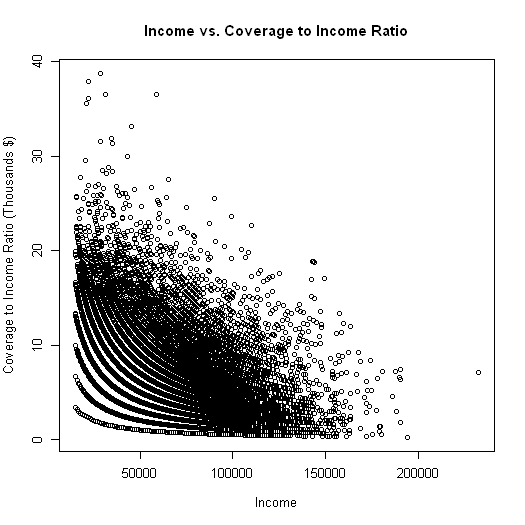

In [12]:
options(repr.plot.res = 75)

plot(x = ins_feat$Income, y = ins_feat$Cov_Income_Ratio, 
     main = "Income vs. Coverage to Income Ratio",
     xlab = "Income",
     ylab = "Coverage to Income Ratio (Thousands $)")


Now let's build a one-class SVM trying to identify 3% of the most anomalous observations.

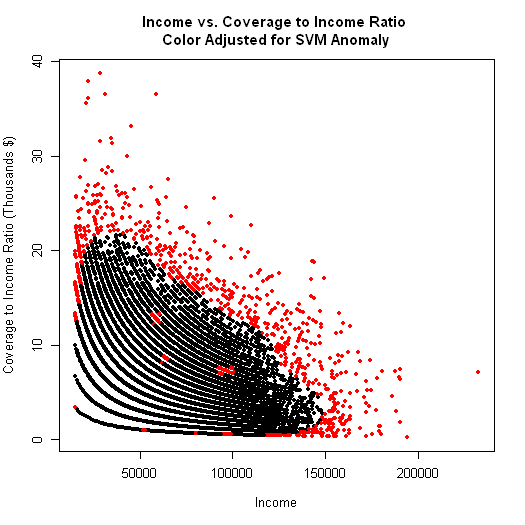

In [13]:
df <- data.frame(income = ins_feat$Income, 
                 CIRatio = ins_feat$Cov_Income_Ratio
                )

model <- svm(x = df, y = rep(1, length(ins_feat$Income)), type='one-classification', nu = 0.03)

df$svm <- predict(model, df)

df$svm <- ifelse(df$svm == TRUE, 1, 2)

plot(CIRatio ~ income, data = df, pch = 20, col = df$svm, 
     main = "Income vs. Coverage to Income Ratio \nColor Adjusted for SVM Anomaly",
     xlab = "Income",
     ylab = "Coverage to Income Ratio (Thousands $)")

From here we would pass these observations to an SME to flag for potential fraud or not fraud.

In [14]:
ins_feat$fraud_flag <- ifelse(df$svm == 1, 0, 1)

head(ins_feat, n = 10)

Cust_ID      Date       Type Reward_R Reward_A diff    Cov_Limit Income
1  PSX000100006 2006-01-17 T    265       50000   17 days  50000     61000
2  PSX000100013 2001-07-11 V    265      100000   29 days 100000     48000
3  PSX000100073 2004-02-14 V    450      100000   24 days 100000     35000
4  PSX000100081 2009-07-26 T    543           0   28 days  50000     69000
5  PSX000100122 1991-09-08 T    200      150000   16 days 150000    105000
6  PSX000100146 2009-04-21 T    275      100000   20 days 100000     38000
7  PSX000100231 2008-05-05 V    405      400000   25 days 400000     79155
8  PSX000100236 1970-10-06 T    469      250000   24 days 250000     54738
9  PSX000100286 2003-03-20 V    337      150000   22 days 150000     95973
10 PSX00010030  1980-01-09 T    377      350000   23 days 350000     37725
   Cov_Income_Ratio fraud_flag
1  0.8196721        0         
2  2.0833333        0         
3  2.8571429        0         
4  0.7246377        0         
5  1.4285714        0         
6  2.6315789        0         
7  5.0533763        0         
8  4.5672111        0         
9  1.5629396        0         
10 9.2776673        0

Let's assume we have done this a few times with a few other variables to achieve a "fraud flag" variable in our dataset.

In [15]:
ins_label <- read.csv("ins_label.csv")

head(ins_label, n = 10)

Cust_ID      Date      Type Reward_R Reward_A diff Cov_Limit Income
1  PSX000100006 1/17/2006 T    265       50000   17    50000     61000
2  PSX000100013 7/11/2001 V    265      100000   29   100000     48000
3  PSX000100073 2/14/2004 V    450      100000   24   100000     35000
4  PSX000100081 7/26/2009 T    543           0   28    50000     69000
5  PSX000100122 9/8/1991  T    200      150000   16   150000    105000
6  PSX000100146 4/21/2009 T    275      100000   20   100000     38000
7  PSX000100231 5/5/2008  V    405      400000   25   400000     79155
8  PSX000100236 10/6/1970 T    469      250000   24   250000     54738
9  PSX000100286 3/20/2003 V    337      150000   22   150000     95973
10 PSX00010030  1/9/1980  T    377      350000   23   350000     37725
   Cov_Income_Ratio fraud_flag
1  0.8196721        0         
2  2.0833333        0         
3  2.8571429        0         
4  0.7246377        0         
5  1.4285714        0         
6  2.6315789        0         
7  5.0533763        0         
8  4.5672111        0         
9  1.5629396        0         
10 9.2776673        0

### Sampling Concerns

When we have a rare event, the modeling may be impacted. It is easy to predict everything isn't fraud and be right a large portion of the time. However, that defeats the purpose of the model. Let's see how rare our fraud is.

In [16]:
prop.table(table(ins_label$fraud_flag))


        0         1 
0.9636756 0.0363244 

Looks like our suspected fraud instances are only 3.63% of the data. This is a rare event problem.

Let's see how many observations we have that are suspected fraud.

In [17]:
table(ins_label$fraud_flag)


    0     1 
42872  1616 

Now's lets sample 1200 suspected fraud and 1200 that are not suspected fraud to balance things out for modeling. This will be our training dataset.

In [18]:
set.seed(12345)
train <- ins_label %>% group_by(fraud_flag) %>% sample_n(1200)

test <- subset(ins_label, !(Cust_ID %in% train$Cust_ID))

In [19]:
table(train$fraud_flag)

table(test$fraud_flag)


   0    1 
1200 1200 


    0     1 
41672   416 

In [20]:
train <- data.frame(train)

Now, we need to weight our observations. If our models do a good job at predicting this training set, it might not be as good as we think. This is due to the training set not looking like our population. When building models, we can weight our observations so that the predictions coming from the model are adjusted back to the original population proportion of our target.

In [21]:
p_0 <- 0.5 
p_1 <- 0.5
P_1 <- sum(ins_label$fraud_flag)/length(ins_label$fraud_flag)
P_0 <- 1 - P_1

train$weight <- ifelse(train$fraud_flag == 1, 1, (p_1*P_0)/(p_0*P_1))

table(train$weight, train$fraud_flag)

                 
                     0    1
  1                  0 1200
  26.529702970297 1200    0

If we wanted to get a little fancier for our adjustment to sampling, we could use SMOTE. The only problem with SMOTE is that we need to use only numerical variables and not categorical ones.

In [22]:
num_names <- c("diff", "Cov_Limit", "Income")
inputs <- ins_label[num_names]
target <- ins_label[,10]

smote_sam <- SMOTE(X = inputs, target = target,
                   K = 5,
                   dup_size = 10)

train_s <- smote_sam$data
train_s$fraud_flag <- abs(as.numeric(train_s$class))
train_s$class <- NULL

table(train_s$fraud_flag)


    0     1 
42872 17776 

From here you would simply split your data into training and testing like we did above. SMOTE isn't the best example for our data because of a couple of restrictions:

1. We can't use categorical data. For us, reward reason and insurance policy may be important but we cannot use them in SMOTE.
2. Data restrictions. Our reward amount has to be the same as the coverage limit so we shouldn't randomly create reward amount. This is the same for our coverage to income ratio variable. It is restricted based on other variables. If we were to use SMOTE, we would need to go back after the fact and create these two variables from the transformations.

## Supervised Modeling

Supervised techniques have a known target they are trying to predict. Let's build a variety of supervised models trying to predict our target - suspected fraud.

### Interpretable Models

The first interpretable model we will build is a decision tree.

In [23]:
fit_dt <- rpart(fraud_flag ~ Type + Reward_R + Reward_A + Income + Cov_Limit + Cov_Income_Ratio + diff, 
                data = train, method = 'class', weight = weight, control = list(maxdepth = 3))

fit_dt

n= 2400 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 2400 1200.00000 0 (0.96367560 0.03632440)  
   2) Reward_A< 1025000 2120  922.00000 0 (0.97180823 0.02819177)  
     4) Income< 142000 2046  848.00000 0 (0.97401211 0.02598789)  
       8) Cov_Income_Ratio< 21.08856 1982  784.00000 0 (0.97592624 0.02407376) *
       9) Cov_Income_Ratio>=21.08856 64    0.00000 1 (0.00000000 1.00000000) *
     5) Income>=142000 74    0.00000 1 (0.00000000 1.00000000) *
   3) Reward_A>=1025000 280   53.05941 1 (0.16027156 0.83972844)  
     6) Reward_R< 106.5 7    6.00000 0 (0.81555319 0.18444681) *
     7) Reward_R>=106.5 273   26.52970 1 (0.08886788 0.91113212)  
      14) Reward_R>=483.5 9    8.00000 0 (0.76831541 0.23168459) *
      15) Reward_R< 483.5 264    0.00000 1 (0.00000000 1.00000000) *

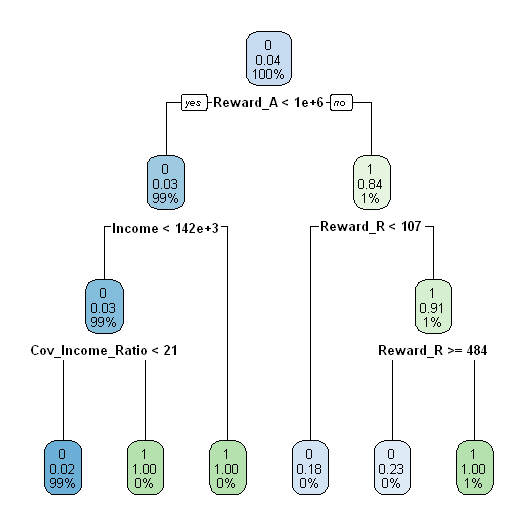

In [24]:
rpart.plot(fit_dt)

In [25]:
train$pred_dt <- predict(fit_dt, train, type = "prob")[,2]

head(train)

Cust_ID      Date      Type Reward_R Reward_A diff Cov_Limit Income
1 PSX000321546 4/30/2007 W    216      100000   26   100000    15000 
2 PSX000799312 4/10/1984 V    244       50000   28    50000    19000 
3 PSX000302769 8/23/2005 T    523           0   21   100000    30000 
4 PSX000101606 2/11/1979 T    371      300000   29   300000    19335 
5 PSX000734805 6/17/1982 T    392      200000   26   200000    43144 
6 PSX000650529 12/6/2008 T    386       50000   29    50000    29000 
  Cov_Income_Ratio fraud_flag weight  pred_dt   
1  6.666667        0          26.5297 0.02407376
2  2.631579        0          26.5297 0.02407376
3  3.333333        0          26.5297 0.02407376
4 15.515904        0          26.5297 0.02407376
5  4.635639        0          26.5297 0.02407376
6  1.724138        0          26.5297 0.02407376

The second interpretable model that we are going to build is a logistic regression model.

In [26]:
fit_lr <-  glm(fraud_flag ~ factor(Type) + factor(Reward_R) + Reward_A + Income + Cov_Limit + Cov_Income_Ratio + diff, 
               data = train, family = binomial(link = "logit"), weight = weight)

summary(fit_lr)


Call:
glm(formula = fraud_flag ~ factor(Type) + factor(Reward_R) + 
    Reward_A + Income + Cov_Limit + Cov_Income_Ratio + diff, 
    family = binomial(link = "logit"), data = train, weights = weight)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4679  -0.8015   0.0000   1.6568   4.3966  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -6.498e+00  1.064e+00  -6.107 1.02e-09 ***
factor(Type)V       -1.680e-01  1.081e-01  -1.555 0.119963    
factor(Type)W       -4.060e-01  1.289e-01  -3.149 0.001641 ** 
factor(Reward_R)101  1.652e+01  1.518e+03   0.011 0.991317    
factor(Reward_R)102 -8.292e-01  1.437e+00  -0.577 0.563949    
factor(Reward_R)103 -8.947e-01  1.484e+00  -0.603 0.546458    
factor(Reward_R)104  3.073e-01  1.172e+00   0.262 0.793180    
factor(Reward_R)105 -1.007e+00  1.507e+00  -0.668 0.504063    
factor(Reward_R)106 -2.149e+00  1.128e+00  -1.906 0.056703 .  
factor(Reward_R)107 -3.257e+00  1.262e+

In [27]:
fit_lr <-  glm(fraud_flag ~ Cov_Limit + Income + Cov_Income_Ratio, 
               data = train, family = binomial(link = "logit"), weight = weight)

summary(fit_lr)


Call:
glm(formula = fraud_flag ~ Cov_Limit + Income + Cov_Income_Ratio, 
    family = binomial(link = "logit"), data = train, weights = weight)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.7350  -0.9574  -0.1126   2.1524   3.2375  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -6.237e+00  1.366e-01 -45.646  < 2e-16 ***
Cov_Limit         6.407e-07  1.893e-07   3.384 0.000715 ***
Income            2.547e-05  1.751e-06  14.550  < 2e-16 ***
Cov_Income_Ratio  1.763e-01  1.220e-02  14.449  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 10312.5  on 2399  degrees of freedom
Residual deviance:  8583.9  on 2396  degrees of freedom
AIC: 8628.4

Number of Fisher Scoring iterations: 5


One of the nice parts about logistic regression is the interpretation of the parameter estimates. We can calculate odds ratios.

In [28]:
exp(
  cbind(coef(fit_lr), confint(fit_lr))
  )

Waiting for profiling to be done...


2.5 %       97.5 %     
(Intercept)      0.001955006 0.001493386 0.002551798
Cov_Limit        1.000000641 1.000000273 1.000001015
Income           1.000025475 1.000022017 1.000028883
Cov_Income_Ratio 1.192839328 1.164483437 1.221564058

For example, if you increase the coverage to income ratio by 1, there is a 19.28% increase in the odds of suspected fraud!

In [29]:
train$pred_lr <- predict(fit_lr, train, type = "response")

head(train)

Cust_ID      Date      Type Reward_R Reward_A diff Cov_Limit Income
1 PSX000321546 4/30/2007 W    216      100000   26   100000    15000 
2 PSX000799312 4/10/1984 V    244       50000   28    50000    19000 
3 PSX000302769 8/23/2005 T    523           0   21   100000    30000 
4 PSX000101606 2/11/1979 T    371      300000   29   300000    19335 
5 PSX000734805 6/17/1982 T    392      200000   26   200000    43144 
6 PSX000650529 12/6/2008 T    386       50000   29    50000    29000 
  Cov_Income_Ratio fraud_flag weight  pred_dt    pred_lr    
1  6.666667        0          26.5297 0.02407376 0.009799314
2  2.631579        0          26.5297 0.02407376 0.005182552
3  3.333333        0          26.5297 0.02407376 0.007992244
4 15.515904        0          26.5297 0.02407376 0.056434480
5  4.635639        0          26.5297 0.02407376 0.014880571
6  1.724138        0          26.5297 0.02407376 0.005694593

Notice how these predictions are probabilities of suspected frauds as compared to 1's and 0's. We will discuss a possible threshold to label as a predicted 1 or 0 later on. Since our data is balanced (equal number of fraud and non-fraud) then 0.5 might be a reasonable threshold.

### Naive Bayes Model

The naive Bayes model is a great initial model to build for any classification problem.

In [30]:
fit_nb <- naiveBayes(fraud_flag ~ Type + Reward_A + Income + Cov_Limit + Cov_Income_Ratio + diff, data = train, weight = weight)

fit_nb


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace, weight = ..1)

A-priori probabilities:
Y
  0   1 
0.5 0.5 

Conditional probabilities:
   Type
Y           T         V         W
  0 0.4858333 0.3083333 0.2058333
  1 0.5308333 0.3033333 0.1658333

   Reward_A
Y       [,1]     [,2]
  0 216125.0 197862.8
  1 544291.7 556063.2

   Income
Y       [,1]     [,2]
  0 54573.10 24214.16
  1 70401.89 45470.11

   Cov_Limit
Y       [,1]     [,2]
  0 229958.3 199458.2
  1 578708.3 552610.4

   Cov_Income_Ratio
Y       [,1]     [,2]
  0 4.654462 3.782782
  1 9.056307 7.627213

   diff
Y       [,1]     [,2]
  0 23.54000 3.896929
  1 23.61167 4.031469


In [31]:
train$pred_nb <- predict(fit_nb, train, type = "raw")[,2]

head(train)


Cust_ID      Date      Type Reward_R Reward_A diff Cov_Limit Income
1 PSX000321546 4/30/2007 W    216      100000   26   100000    15000 
2 PSX000799312 4/10/1984 V    244       50000   28    50000    19000 
3 PSX000302769 8/23/2005 T    523           0   21   100000    30000 
4 PSX000101606 2/11/1979 T    371      300000   29   300000    19335 
5 PSX000734805 6/17/1982 T    392      200000   26   200000    43144 
6 PSX000650529 12/6/2008 T    386       50000   29    50000    29000 
  Cov_Income_Ratio fraud_flag weight  pred_dt    pred_lr     pred_nb   
1  6.666667        0          26.5297 0.02407376 0.009799314 0.03789394
2  2.631579        0          26.5297 0.02407376 0.005182552 0.03781712
3  3.333333        0          26.5297 0.02407376 0.007992244 0.03011107
4 15.515904        0          26.5297 0.02407376 0.056434480 0.70657419
5  4.635639        0          26.5297 0.02407376 0.014880571 0.01882672
6  1.724138        0          26.5297 0.02407376 0.005694593 0.03380004

### More Advanced Models

In the realm of machine learning there are many more advanced algorithms that we can use to build our models.

Let's first see how to build a random forest.

In [32]:
fit_rf <- randomForest(as.factor(fraud_flag) ~ Type + Reward_A + Income + Cov_Limit + Cov_Income_Ratio + diff, 
                       data = train, ntree = 500, weight = weight)

importance(fit_rf)

MeanDecreaseGini
Type              15.28178       
Reward_A         194.14059       
Income           336.52019       
Cov_Limit        262.05364       
Cov_Income_Ratio 311.28014       
diff              43.21824

In [33]:
train$pred_rf <- predict(fit_rf, train, type = "prob")[,2]

head(train)

Cust_ID      Date      Type Reward_R Reward_A diff Cov_Limit Income
1 PSX000321546 4/30/2007 W    216      100000   26   100000    15000 
2 PSX000799312 4/10/1984 V    244       50000   28    50000    19000 
3 PSX000302769 8/23/2005 T    523           0   21   100000    30000 
4 PSX000101606 2/11/1979 T    371      300000   29   300000    19335 
5 PSX000734805 6/17/1982 T    392      200000   26   200000    43144 
6 PSX000650529 12/6/2008 T    386       50000   29    50000    29000 
  Cov_Income_Ratio fraud_flag weight  pred_dt    pred_lr     pred_nb    pred_rf
1  6.666667        0          26.5297 0.02407376 0.009799314 0.03789394 0.042  
2  2.631579        0          26.5297 0.02407376 0.005182552 0.03781712 0.058  
3  3.333333        0          26.5297 0.02407376 0.007992244 0.03011107 0.010  
4 15.515904        0          26.5297 0.02407376 0.056434480 0.70657419 0.124  
5  4.635639        0          26.5297 0.02407376 0.014880571 0.01882672 0.042  
6  1.724138        0          26.5297 0.02407376 0.005694593 0.03380004 0.036

The next more advanced model we will build is a gradient boosting model. There are a variety of these models. We will build an XGBoost model.

First we need to structure our data correctly for the function.

In [34]:
sparse_train <- sparse.model.matrix(fraud_flag ~ Type + Reward_A + Income + Cov_Limit + Cov_Income_Ratio + diff - fraud_flag, 
                                   data=train, weight = weight)

train_label <- train$fraud_flag

Now let's build the model!

In [35]:
fit_xg <- xgboost(data = sparse_train, label = train_label,
                 eta = 0.05, max_depth = 3, gamma = 0, nrounds = 500, objective = "binary:logistic")

[15:42:18] WARNING: amalgamation/../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1]	train-logloss:0.668131 
[2]	train-logloss:0.645486 
[3]	train-logloss:0.623312 
[4]	train-logloss:0.603113 
[5]	train-logloss:0.585893 
[6]	train-logloss:0.568849 
[7]	train-logloss:0.554302 
[8]	train-logloss:0.539526 
[9]	train-logloss:0.525889 
[10]	train-logloss:0.511317 
[11]	train-logloss:0.499302 
[12]	train-logloss:0.484456 
[13]	train-logloss:0.470778 
[14]	train-logloss:0.457764 
[15]	train-logloss:0.448275 
[16]	train-logloss:0.436696 
[17]	train-logloss:0.428392 
[18]	train-logloss:0.418359 
[19]	train-logloss:0.410169 
[20]	train-logloss:0.402640 
[21]	train-logloss:0.395312 
[22]	train-logloss:0.387211 
[23]	train-logloss:0.380705 
[24]	train-logloss:0.374252 
[25]	train-logloss:0.368157 
[26]	train-logloss:

In [36]:
names <- dimnames(data.matrix(sparse_train[,-1]))[[2]]

xgb.importance(model = fit_xg)

Feature          Gain         Cover       Frequency  
1 Cov_Limit        0.3676039994 0.103272391 0.063573255
2 Income           0.3075664450 0.358321141 0.379247351
3 Cov_Income_Ratio 0.2917454450 0.398613815 0.364267446
4 Reward_A         0.0247200174 0.068537519 0.089514066
5 diff             0.0066125302 0.058836243 0.085495068
6 TypeW            0.0013953736 0.012108215 0.010960906
7 TypeV            0.0003561894 0.000310676 0.006941907

In [37]:
train$pred_xg <- predict(fit_xg, sparse_train, type = "prob")

head(train)

Cust_ID      Date      Type Reward_R Reward_A diff Cov_Limit Income
1 PSX000321546 4/30/2007 W    216      100000   26   100000    15000 
2 PSX000799312 4/10/1984 V    244       50000   28    50000    19000 
3 PSX000302769 8/23/2005 T    523           0   21   100000    30000 
4 PSX000101606 2/11/1979 T    371      300000   29   300000    19335 
5 PSX000734805 6/17/1982 T    392      200000   26   200000    43144 
6 PSX000650529 12/6/2008 T    386       50000   29    50000    29000 
  Cov_Income_Ratio fraud_flag weight  pred_dt    pred_lr     pred_nb    pred_rf
1  6.666667        0          26.5297 0.02407376 0.009799314 0.03789394 0.042  
2  2.631579        0          26.5297 0.02407376 0.005182552 0.03781712 0.058  
3  3.333333        0          26.5297 0.02407376 0.007992244 0.03011107 0.010  
4 15.515904        0          26.5297 0.02407376 0.056434480 0.70657419 0.124  
5  4.635639        0          26.5297 0.02407376 0.014880571 0.01882672 0.042  
6  1.724138        0          26.5297 0.02407376 0.005694593 0.03380004 0.036  
  pred_xg   
1 0.08416853
2 0.06074922
3 0.02406885
4 0.12160959
5 0.03264647
6 0.04810261

### Model Evaluation

A common measure for comparing classification models is area under the ROC curve. It isn't the only metric, but worth taking a look at for our models.

First let's look at the decision tree.

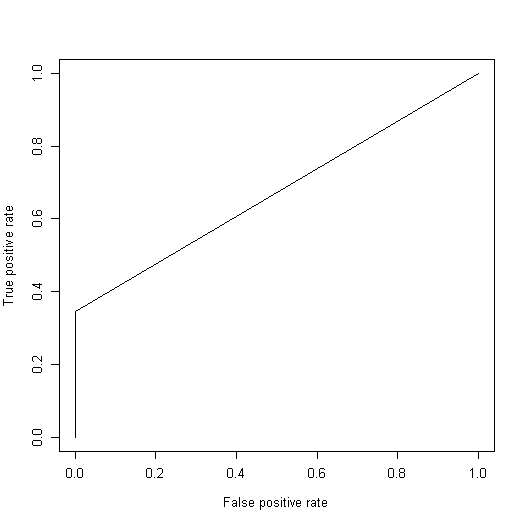

In [38]:
perf_dt <- performance(prediction(train$pred_dt, train$fraud_flag),"tpr","fpr")

plot(perf_dt)

That was the ROC curve, but let's calculate the AUC.

In [39]:
auc_dt <- performance(prediction(train$pred_dt, train$fraud_flag), measure = "auc")

auc_dt@y.values[[1]]

[1] 0.6727799

Let's see how we did for the logistic regression.

[1] 0.6956184

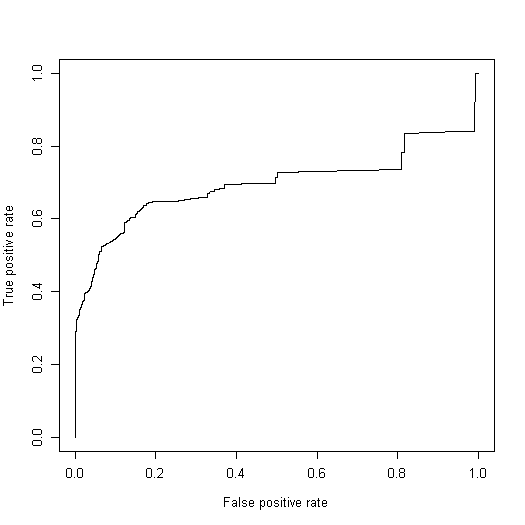

In [40]:
perf_lr <- performance(prediction(train$pred_lr, train$fraud_flag),"tpr","fpr")

plot(perf_lr)
performance(prediction(train$pred_lr, train$fraud_flag), measure = "auc")@y.values[[1]]

Slightly better than the decision tree. 

How about the naive Bayes model.

[1] 0.8316698

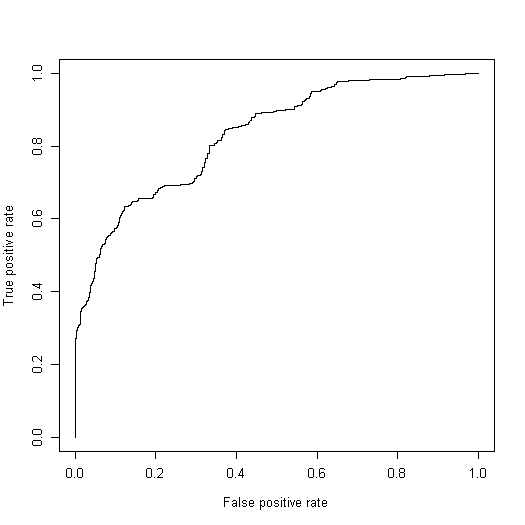

In [41]:
perf_nb <- performance(prediction(train$pred_nb, train$fraud_flag),"tpr","fpr")

plot(perf_nb)
performance(prediction(train$pred_nb, train$fraud_flag), measure = "auc")@y.values[[1]]

Best one so far! 

Let's look at the machine learning models. First, the random forest.

[1] 0.9989267

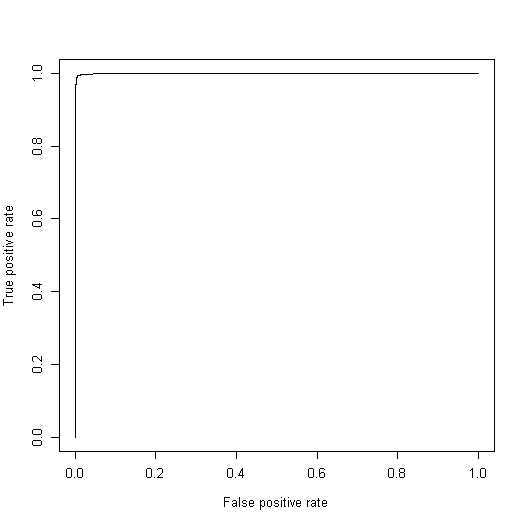

In [42]:
perf_rf <- performance(prediction(train$pred_rf, train$fraud_flag),"tpr","fpr")

plot(perf_rf)
performance(prediction(train$pred_rf, train$fraud_flag), measure = "auc")@y.values[[1]]

Wow! That is really good. So good that we might be overfitting a little bit. Let's look at the XGBoost.

[1] 0.9902635

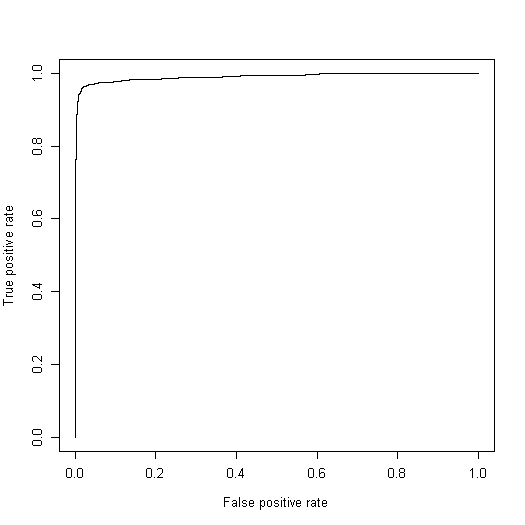

In [43]:
perf_xg <- performance(prediction(train$pred_xg, train$fraud_flag),"tpr","fpr")

plot(perf_xg)
performance(prediction(train$pred_xg, train$fraud_flag), measure = "auc")@y.values[[1]]

Again, very high. Why would this be the case?

Remember, we are predicting suspected fraud based on anomalies in our variables. Essentially, it seems that the machine learning models are repeating back to us, the same anomalies. 

Let's look at how the random forest model does in terms of the confusion matrix.

In [44]:
confusionMatrix(train$fraud_flag, train$pred_rf, threshold = 0.5)

sens <- NULL
spec <- NULL
youden <- NULL
cutoff <- NULL

for(i in 1:49){
  cutoff = c(cutoff, i/50)
  sens <- c(sens, sensitivity(train$fraud_flag, train$pred_rf, threshold = i/50))
  spec <- c(spec, specificity(train$fraud_flag, train$pred_rf, threshold = i/50))
  youden <- c(youden, youdensIndex(train$fraud_flag, train$pred_rf, threshold = i/50))
}

ctable <- data.frame(cutoff, sens, spec, youden)

head(ctable, n = 35)

0    1   
0 1194   10
1    6 1190

cutoff sens      spec      youden   
1  0.02   1.0000000 0.6033333 0.6033333
2  0.04   1.0000000 0.7475000 0.7475000
3  0.06   1.0000000 0.7950000 0.7950000
4  0.08   1.0000000 0.8241667 0.8241667
5  0.10   1.0000000 0.8441667 0.8441667
6  0.12   1.0000000 0.8783333 0.8783333
7  0.14   1.0000000 0.8966667 0.8966667
8  0.16   0.9991667 0.9125000 0.9116667
9  0.18   0.9991667 0.9250000 0.9241667
10 0.20   0.9991667 0.9316667 0.9308333
11 0.22   0.9991667 0.9341667 0.9333333
12 0.24   0.9991667 0.9391667 0.9383333
13 0.26   0.9991667 0.9458333 0.9450000
14 0.28   0.9991667 0.9533333 0.9525000
15 0.30   0.9983333 0.9633333 0.9616667
16 0.32   0.9983333 0.9691667 0.9675000
17 0.34   0.9975000 0.9750000 0.9725000
18 0.36   0.9975000 0.9825000 0.9800000
19 0.38   0.9958333 0.9858333 0.9816667
20 0.40   0.9950000 0.9891667 0.9841667
21 0.42   0.9950000 0.9908333 0.9858333
22 0.44   0.9950000 0.9916667 0.9866667
23 0.46   0.9933333 0.9933333 0.9866667
24 0.48   0.9925000 0.9950000 0.9875000
25 0.50   0.9916667 0.9950000 0.9866667
26 0.52   0.9908333 0.9950000 0.9858333
27 0.54   0.9891667 0.9958333 0.9850000
28 0.56   0.9875000 0.9966667 0.9841667
29 0.58   0.9858333 0.9966667 0.9825000
30 0.60   0.9800000 0.9975000 0.9775000
31 0.62   0.9783333 0.9975000 0.9758333
32 0.64   0.9741667 0.9975000 0.9716667
33 0.66   0.9708333 0.9983333 0.9691667
34 0.68   0.9708333 0.9983333 0.9691667
35 0.70   0.9691667 0.9983333 0.9675000

Let's see how good this model does on our testing data set.

In [45]:
test$pred_rf <- predict(fit_rf, test, type = "prob")[,2]

head(test)

Cust_ID      Date      Type Reward_R Reward_A diff Cov_Limit Income
1 PSX000100006 1/17/2006 T    265       50000   17    50000     61000
2 PSX000100013 7/11/2001 V    265      100000   29   100000     48000
3 PSX000100073 2/14/2004 V    450      100000   24   100000     35000
4 PSX000100081 7/26/2009 T    543           0   28    50000     69000
5 PSX000100122 9/8/1991  T    200      150000   16   150000    105000
6 PSX000100146 4/21/2009 T    275      100000   20   100000     38000
  Cov_Income_Ratio fraud_flag pred_rf
1 0.8196721        0          0.214  
2 2.0833333        0          0.012  
3 2.8571429        0          0.000  
4 0.7246377        0          0.232  
5 1.4285714        0          0.060  
6 2.6315789        0          0.000

[1] 0.9806521

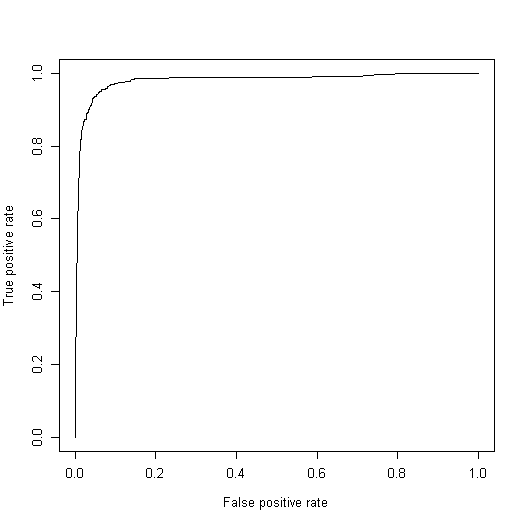

In [46]:
perf_rf <- performance(prediction(test$pred_rf, test$fraud_flag),"tpr","fpr")

plot(perf_rf)
performance(prediction(test$pred_rf, test$fraud_flag), measure = "auc")@y.values[[1]]

Still very good, but not surprisingly, a little worse on data it has never seen before.

Again, this does a good job of repeating back to us something that we have already suspected as fraud. What about new cases of fraud?

### NOT-Fraud Model

Let's flip the target around and see what we get for our NOT-fraud model.

In [47]:
train$not_fraud <- ifelse(train$fraud_flag == 1, 0, 1) 

In [48]:
fit_rf_NOT <- randomForest(as.factor(not_fraud) ~ Type + Reward_A + Income + Cov_Limit + Cov_Income_Ratio + diff, 
                       data = train, ntree = 500, weight = weight)

importance(fit_rf_NOT)

MeanDecreaseGini
Type              14.81859       
Reward_A         193.56371       
Income           339.80788       
Cov_Limit        252.91200       
Cov_Income_Ratio 319.76236       
diff              41.85287

In [49]:
test$pred_rf_NOT <- predict(fit_rf_NOT, test, type = "prob")[,2]

head(test)

Cust_ID      Date      Type Reward_R Reward_A diff Cov_Limit Income
1 PSX000100006 1/17/2006 T    265       50000   17    50000     61000
2 PSX000100013 7/11/2001 V    265      100000   29   100000     48000
3 PSX000100073 2/14/2004 V    450      100000   24   100000     35000
4 PSX000100081 7/26/2009 T    543           0   28    50000     69000
5 PSX000100122 9/8/1991  T    200      150000   16   150000    105000
6 PSX000100146 4/21/2009 T    275      100000   20   100000     38000
  Cov_Income_Ratio fraud_flag pred_rf pred_rf_NOT
1 0.8196721        0          0.214   0.766      
2 2.0833333        0          0.012   0.998      
3 2.8571429        0          0.000   1.000      
4 0.7246377        0          0.232   0.772      
5 1.4285714        0          0.060   0.924      
6 2.6315789        0          0.000   0.998

Notice how the predictions are not just the exact opposite in probability! We want to find observations that are low in both models.

In [50]:
test$pred_avg <- 0.5*(test$pred_rf + test$pred_rf_NOT)

head(test)

Cust_ID      Date      Type Reward_R Reward_A diff Cov_Limit Income
1 PSX000100006 1/17/2006 T    265       50000   17    50000     61000
2 PSX000100013 7/11/2001 V    265      100000   29   100000     48000
3 PSX000100073 2/14/2004 V    450      100000   24   100000     35000
4 PSX000100081 7/26/2009 T    543           0   28    50000     69000
5 PSX000100122 9/8/1991  T    200      150000   16   150000    105000
6 PSX000100146 4/21/2009 T    275      100000   20   100000     38000
  Cov_Income_Ratio fraud_flag pred_rf pred_rf_NOT pred_avg
1 0.8196721        0          0.214   0.766       0.490   
2 2.0833333        0          0.012   0.998       0.505   
3 2.8571429        0          0.000   1.000       0.500   
4 0.7246377        0          0.232   0.772       0.502   
5 1.4285714        0          0.060   0.924       0.492   
6 2.6315789        0          0.000   0.998       0.499

In [51]:
test[head(order(test$pred_avg), n = 15),]

Cust_ID      Date       Type Reward_R Reward_A diff Cov_Limit Income
44375 PSX000997924 8/23/1987  T    184      800000   27   800000    49633 
26970 PSX000644316 7/28/2011  W    247      700000   26   700000    75282 
9146  PSX000282910 7/20/2005  W    249      150000   26   150000    49000 
9248  PSX000284780 10/18/2002 W    213      150000   26   150000    48000 
34314 PSX000793179 9/10/2008  W    285      150000   26   150000    48451 
37459 PSX000857546 12/23/2011 W    139      700000   26   700000    73403 
17638 PSX000454045 10/22/2008 T    234      150000   26   150000    49000 
29001 PSX000686271 2/9/1987   T    317      150000   26   150000    49000 
39969 PSX000908976 6/6/1991   T    456      150000   26   150000    49000 
40088 PSX000911131 10/8/2008  T    132      150000   26   150000    49000 
27183 PSX000648499 10/27/1989 W    431      700000   22   700000    73902 
43675 PSX000983497 3/19/1995  W    365      700000   26   700000    72993 
41354 PSX000937261 2/5/1991   W    311      700000   27   700000    74915 
20752 PSX000516876 1/14/2012  T    109      350000   23   350000    56610 
9737  PSX000294722 4/21/1999  T    512           0   27    50000    54000 
      Cov_Income_Ratio fraud_flag pred_rf pred_rf_NOT pred_avg
44375 16.1183084       0          0.446   0.446       0.446   
26970  9.2983715       0          0.634   0.266       0.450   
9146   3.0612245       0          0.076   0.826       0.451   
9248   3.1250000       0          0.252   0.650       0.451   
34314  3.0959113       0          0.178   0.726       0.452   
37459  9.5363950       0          0.602   0.302       0.452   
17638  3.0612245       0          0.188   0.718       0.453   
29001  3.0612245       0          0.188   0.718       0.453   
39969  3.0612245       0          0.188   0.718       0.453   
40088  3.0612245       0          0.188   0.718       0.453   
27183  9.4720035       0          0.556   0.352       0.454   
43675  9.5899607       0          0.580   0.332       0.456   
41354  9.3439231       0          0.490   0.426       0.458   
20752  6.1826532       0          0.264   0.652       0.458   
9737   0.9259259       0          0.354   0.564       0.459

Some of those observations are not really high on either of the models!

## Implementation and Deployment

Let's try to interpret our fraud model that was a random forest. LIME in R has to be built on certain model structures. Specifically, models built using the "caret" package (as well as a variety of other black box approach packages). 

To make this easier we can structure our variables in a way to make it easier to rebuild our model in caret.

In [55]:
caret_train <- train[, c("Cov_Limit", "Income", "Cov_Income_Ratio", "fraud_flag")]

head(caret_train)

caret_test <- test[, c("Cov_Limit", "Income", "Cov_Income_Ratio", "fraud_flag")]

Cov_Limit Income Cov_Income_Ratio fraud_flag
1 100000    15000   6.666667        0         
2  50000    19000   2.631579        0         
3 100000    30000   3.333333        0         
4 300000    19335  15.515904        0         
5 200000    43144   4.635639        0         
6  50000    29000   1.724138        0

Now we can just build out our random forest.

In [53]:
fit_rf <- caret::train(as.factor(fraud_flag) ~ ., data = caret_train,
                  method='rf')

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Now we can use the LIME function to help explain certain observations in our data. Specifically, we are going to look at observation 6716 and 6718 - one fraud and one not fraud.

Warning message:
"fraud_flag does not contain enough variance to use quantile binning. Using standard binning instead."Warning message in gower_work(x = x, y = y, pair_x = pair_x, pair_y = pair_y, n = NULL, :
"skipping variable with zero or non-finite range"

$Cov_Limit
     0%     25%     50%     75%    100% 
  50000  100000  150000  300000 2700000 

$Income
      0%      25%      50%      75%     100% 
 15000.0  36000.0  51000.0  69588.5 190225.0 

$Cov_Income_Ratio
        0%        25%        50%        75%       100% 
 0.2906977  1.9935183  3.5676220  6.4074937 36.1190122 

$fraud_flag
[1] 0.00 0.25 0.50 0.75 1.00

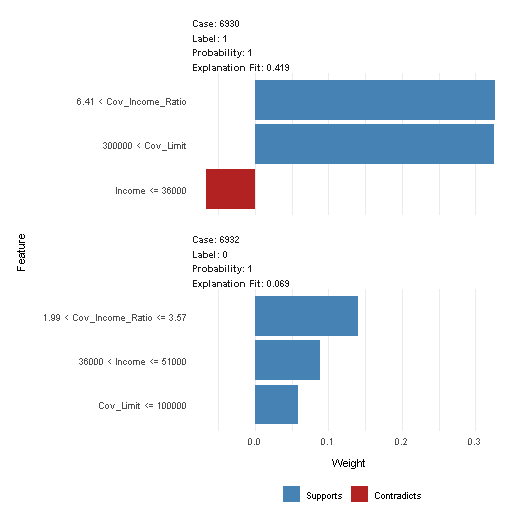

In [72]:
explainer <- lime(caret_test, fit_rf, bin_continuous = TRUE, quantile_bins = TRUE)
explanation <- explain(caret_test[c(6716, 6718),], explainer, n_labels = 1, n_features = 3)

plot_features(explanation, ncol = 1)

explainer$bin_cuts